# Pymaceuticals Data Analysis

In reviewing 10 potential treatments for squamous cell carcinoma (SCC), 250 mice were tested over a 45 days period with 25 mice tested per treatment. When controlling against a placebo, 2 promising options emerge: Capomulin and Ramicane. 

Average tumor volume decreased, metastatic spread was less, and survival rate was higher for both groups versus the placebo. Ramicane demonstrated largest impact against tumor volume (10.04 mm3 decrease versus 8.76 mm3). Additionally, less metastatic spread was observed in the Ramicane group than Capomulin (1.25 site vs 1.47 site). That being said, the Capomulin group saw a higher survival rate, with 21 of the mice suriviving treatment versus 20 from the Ramicane group. Further testing would be necessary to inquire if this trend is significant.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_file = "data/mouse_drug_data.csv"
clinical_file = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_raw = pd.read_csv(mouse_file)
clinic_raw = pd.read_csv(clinical_file)

# Combine the data into a single dataset
mc_scrub = pd.merge(clinic_raw, mouse_raw, how="outer", on="Mouse ID")

# Display the data table for preview
mc_scrub.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint in DataFrame
drug_means = pd.DataFrame(mc_scrub.groupby(['Timepoint','Drug']).agg({'Tumor Volume (mm3)':'mean'}))
drug_means = drug_means.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume (mm3)'})
drug_means.head()

Mean Tumor Volume (mm3)
Timepoint Drug                              
0         Capomulin                     45.0
          Ceftamin                      45.0
          Infubinol                     45.0
          Ketapril                      45.0
          Naftisol                      45.0

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint in DataFrame
drug_sems = pd.DataFrame(mc_scrub.groupby(['Timepoint','Drug']).agg({'Tumor Volume (mm3)':'sem'}))
drug_sems = drug_sems.rename(columns={'Tumor Volume (mm3)': 'Standard Error Tumor Volume (mm3)'})
drug_sems.head()


Standard Error Tumor Volume (mm3)
Timepoint Drug                                        
0         Capomulin                                0.0
          Ceftamin                                 0.0
          Infubinol                                0.0
          Ketapril                                 0.0
          Naftisol                                 0.0

In [4]:
#unstack mean data to provide a clean DataFrame for plotting
mean_scrub = drug_means.unstack()
mean_scrub.columns = mean_scrub.columns.get_level_values(1)
mean_scrub

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
#unstack standard error data to provide a clean DataFrame for plotting
sem_scrub = drug_sems.unstack()
sem_scrub.columns = sem_scrub.columns.get_level_values(1)
sem_scrub

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


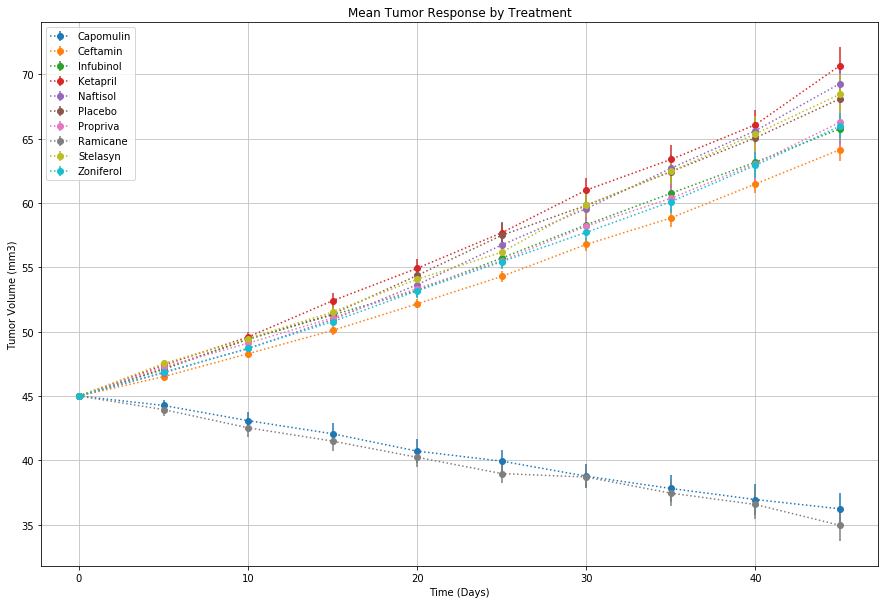

In [6]:
# use a for loop to iterate through the columns to generate a plot of the change in tumor size over time
plt.figure(figsize = (15, 10))
for column in mean_scrub:
    plt.errorbar(mean_scrub.index, mean_scrub[column], yerr=sem_scrub[column], fmt=":o")

plt.grid(color="0.75", linestyle="-")
plt.legend()
plt.title("Mean Tumor Response by Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig('reponse_by_treatment.jpg')
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint in DataFrame
meta_means = pd.DataFrame(mc_scrub.groupby(['Timepoint','Drug']).agg({'Metastatic Sites':'mean'}))
meta_means = meta_means.rename(columns={'Metastatic Sites': 'Mean # of Metastatic Sites'})
meta_means.head()


Mean # of Metastatic Sites
Timepoint Drug                                 
0         Capomulin                         0.0
          Ceftamin                          0.0
          Infubinol                         0.0
          Ketapril                          0.0
          Naftisol                          0.0

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint in Data Frame
meta_sems = pd.DataFrame(mc_scrub.groupby(['Timepoint','Drug']).agg({'Metastatic Sites':'sem'}))
meta_sems = meta_sems.rename(columns={'Metastatic Sites': 'Standard Error of Metastatic Sites'})
meta_sems.head()


Standard Error of Metastatic Sites
Timepoint Drug                                         
0         Capomulin                                 0.0
          Ceftamin                                  0.0
          Infubinol                                 0.0
          Ketapril                                  0.0
          Naftisol                                  0.0

In [9]:
#unstack mean data to provide a clean DataFrame for plotting
meta_mscrub = meta_means.unstack()
meta_mscrub.columns = meta_mscrub.columns.get_level_values(1)
meta_mscrub

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [10]:
#unstack mean data to provide a clean DataFrame for plotting
meta_sscrub = meta_sems.unstack()
meta_sscrub.columns = meta_sscrub.columns.get_level_values(1)
meta_sscrub

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


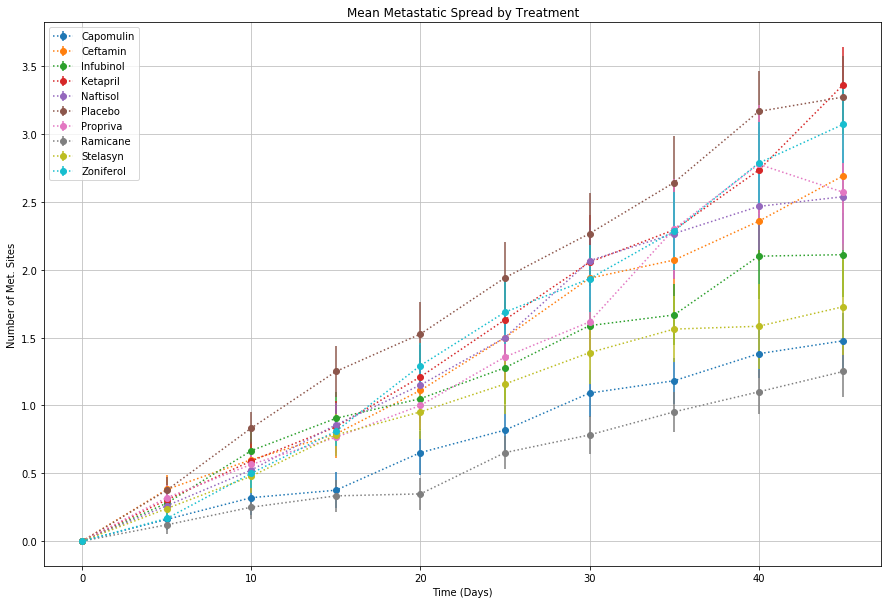

In [11]:
# use a for loop to iterate through the columns to generate a plot of the change in tumor size over time
plt.figure(figsize = (15, 10))
for column in meta_mscrub:
    plt.errorbar(meta_mscrub.index, meta_mscrub[column], yerr=meta_sscrub[column], fmt=":o")

plt.grid(color="0.75", linestyle="-")
plt.legend()
plt.title("Mean Metastatic Spread by Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Number of Met. Sites")

# Save the Figure
plt.savefig('meta_sites_by_treatment.jpg')
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint with unique counts of Mouse ID to determine survival rate
mouse_counts = pd.DataFrame(mc_scrub.groupby(['Timepoint','Drug']).agg({'Mouse ID':'nunique'}))
mouse_counts.head()

Mouse ID
Timepoint Drug               
0         Capomulin        25
          Ceftamin         25
          Infubinol        25
          Ketapril         25
          Naftisol         25

In [13]:
# Minor Data Munging to Re-Format the Data Frames
mc_scrub = mouse_counts.unstack()
mc_scrub.columns = mc_scrub.columns.get_level_values(1)
mc_scrub

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


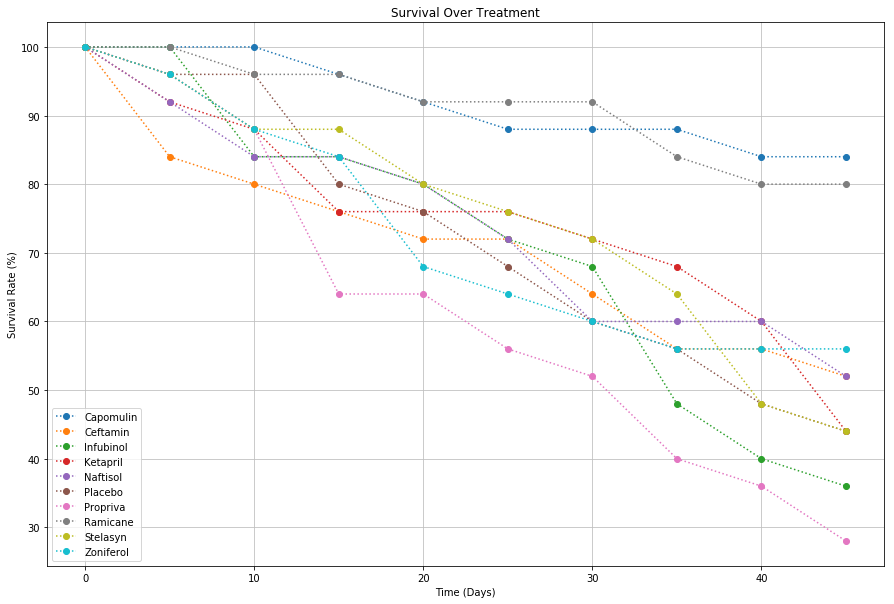

In [14]:
# Generate the Plot (Accounting for percentages) to visualize mouse survival rate over time
plt.figure(figsize = (15, 10))
for column in mc_scrub:
    plt.plot(mc_scrub.index, (mc_scrub[column]/25)*100, linestyle=":", marker="o")
plt.grid(color="0.75", linestyle="-")
plt.legend()
plt.title("Survival Over Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig('survival_rate_by_treatment.jpg')
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug via dictionary
tumor_change = {}
for column in mean_scrub:
    tumor_change[column] = ((mean_scrub.loc[45, column] - mean_scrub.loc[0, column])/mean_scrub.loc[0, column])*100

In [16]:
#Convert dictionary to DataFrame for further parsing
change_summ = pd.DataFrame.from_dict(tumor_change, orient='index')
change_summ['Tumor Shrink?'] = change_summ[0] < 0
change_summ = change_summ.rename(columns={0: '%Change in Mean Tumor Volume'})
change_summ

,%Change in Mean Tumor Volume,Tumor Shrink?
Capomulin,-19.475303,True
Ceftamin,42.516492,False
Infubinol,46.123472,False
Ketapril,57.028795,False
Naftisol,53.923347,False
Placebo,51.297960,False
Propriva,47.241175,False
Ramicane,-22.320900,True
Stelasyn,52.085134,False
Zoniferol,46.579751,False


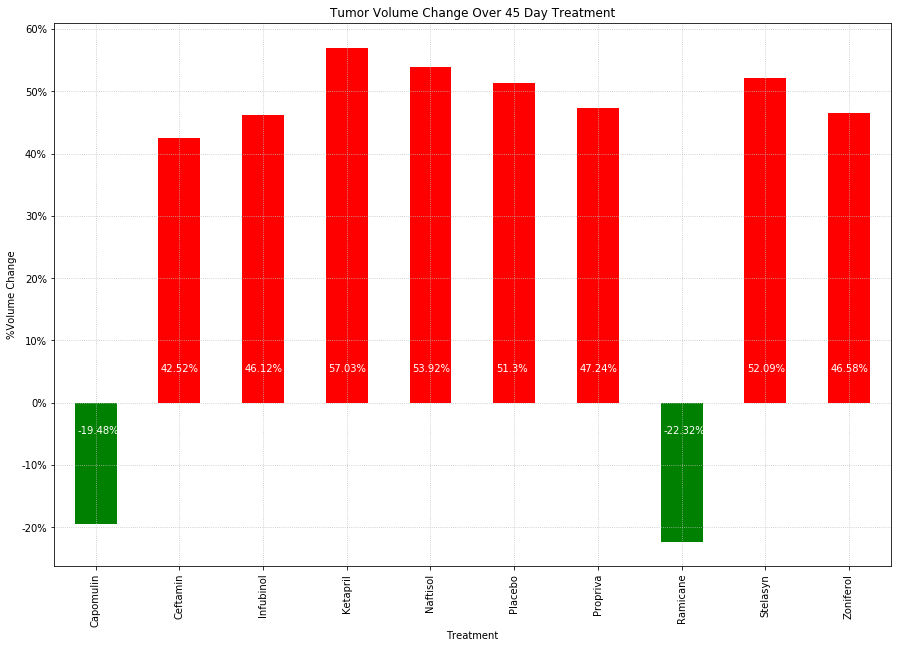

In [17]:
# set figure dimensions for easy reading
plt.figure(figsize = (15, 10))
#determine plot figure based on the change in summary DataFrame
change_vis = change_summ['%Change in Mean Tumor Volume'].plot(kind="bar", color=change_summ['Tumor Shrink?'].map({True: 'g', False: 'r'}))

#set aesthetics and titles
plt.grid(color="0.75", linestyle=":")
plt.title("Tumor Volume Change Over 45 Day Treatment")
plt.xlabel("Treatment")
plt.ylabel("%Volume Change")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 

# Use a for loop to add column value labels
totals = []
for c in change_vis.patches:
    #capture the value
    y_val = c.get_height()
    #determine the position the label needs to be
    if y_val < 0:
        y_pos = -5
    else:
        y_pos = 5
    #write the text
    change_vis.text(c.get_x()+.03, y_pos, str(round(y_val,2))+ "%", fontsize=10, color='white')

# Save the Figure
plt.savefig('tumor_change_by_treatment.jpg')

# Show the Figure
plt.show()